In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
from citipy import citipy

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [5]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_keys

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_keys

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1    
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | busselton
Processing Record 2 of Set 13 | constitucion
Processing Record 3 of Set 13 | georgetown
Processing Record 4 of Set 13 | port alfred
Processing Record 5 of Set 13 | brody
Processing Record 6 of Set 13 | atuona
Processing Record 7 of Set 13 | dukat
Processing Record 8 of Set 13 | ushuaia
Processing Record 9 of Set 13 | bansda
City not found. Skipping...
Processing Record 10 of Set 13 | trebinje
Processing Record 11 of Set 13 | punta arenas
Processing Record 12 of Set 13 | hilo
Processing Record 13 of Set 13 | new norfolk
Processing Record 14 of Set 13 | jalu
Processing Record 15 of Set 13 | dunedin
Processing Record 16 of Set 13 | rio claro
Processing Record 17 of Set 13 | bubaque
Processing Record 18 of Set 13 | butaritari
Processing Record 19 of Set 13 | grand centre
City not found. Skipping...
Processing Record 20 of Set 13 | san patricio
Processing Record 21 of Set 13 | taolanaro
Cit

Processing Record 33 of Set 16 | kruisfontein
Processing Record 34 of Set 16 | vermilion
Processing Record 35 of Set 16 | neiafu
Processing Record 36 of Set 16 | lambarene
Processing Record 37 of Set 16 | daru
Processing Record 38 of Set 16 | pisco
Processing Record 39 of Set 16 | trincomalee
Processing Record 40 of Set 16 | strezhevoy
Processing Record 41 of Set 16 | mattru
Processing Record 42 of Set 16 | vao
Processing Record 43 of Set 16 | byron bay
Processing Record 44 of Set 16 | kurilsk
Processing Record 45 of Set 16 | mount isa
Processing Record 46 of Set 16 | kropotkin
Processing Record 47 of Set 16 | bathsheba
Processing Record 48 of Set 16 | salalah
Processing Record 49 of Set 16 | jadu
Processing Record 50 of Set 16 | reguengos de monsaraz
Processing Record 1 of Set 17 | palasa
Processing Record 2 of Set 17 | esperance
Processing Record 3 of Set 17 | awbari
Processing Record 4 of Set 17 | hermanus
Processing Record 5 of Set 17 | sibu
Processing Record 6 of Set 17 | biak
Pro

Processing Record 19 of Set 20 | tambura
Processing Record 20 of Set 20 | huayapam
City not found. Skipping...
Processing Record 21 of Set 20 | ahipara
Processing Record 22 of Set 20 | marquette
Processing Record 23 of Set 20 | puerto suarez
Processing Record 24 of Set 20 | luena
Processing Record 25 of Set 20 | burica
City not found. Skipping...
Processing Record 26 of Set 20 | russell
Processing Record 27 of Set 20 | monrovia
Processing Record 28 of Set 20 | morondava
Processing Record 29 of Set 20 | constantine
Processing Record 30 of Set 20 | luebo
Processing Record 31 of Set 20 | yerbogachen
Processing Record 32 of Set 20 | iwaki
Processing Record 33 of Set 20 | nantucket
Processing Record 34 of Set 20 | nanortalik
Processing Record 35 of Set 20 | wanxian
Processing Record 36 of Set 20 | mount gambier
Processing Record 37 of Set 20 | deputatskiy
Processing Record 38 of Set 20 | bensonville
Processing Record 39 of Set 20 | khor
Processing Record 40 of Set 20 | longlac
City not foun

Processing Record 2 of Set 24 | sotouboua
Processing Record 3 of Set 24 | moose factory
Processing Record 4 of Set 24 | tezu
Processing Record 5 of Set 24 | sovetskiy
Processing Record 6 of Set 24 | hohhot
Processing Record 7 of Set 24 | turukhansk
Processing Record 8 of Set 24 | labuan
Processing Record 9 of Set 24 | lolua
City not found. Skipping...
Processing Record 10 of Set 24 | mildura
Processing Record 11 of Set 24 | kavieng
Processing Record 12 of Set 24 | kupang
Processing Record 13 of Set 24 | banjar
Processing Record 14 of Set 24 | ano mera
Processing Record 15 of Set 24 | callaway
Processing Record 16 of Set 24 | skelleftea
Processing Record 17 of Set 24 | korce
Processing Record 18 of Set 24 | ust-kamchatsk
City not found. Skipping...
Processing Record 19 of Set 24 | soure
Processing Record 20 of Set 24 | grindavik
Processing Record 21 of Set 24 | dudinka
Processing Record 22 of Set 24 | locri
Processing Record 23 of Set 24 | urus-martan
Processing Record 24 of Set 24 | ka

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
len(cities)

611

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,54.12,90,95,14.45,AU,2022-07-17 22:47:26
1,Constitucion,-35.3333,-72.4167,49.69,93,100,6.31,CL,2022-07-17 22:47:27
2,Georgetown,5.4112,100.3354,82.89,92,20,1.01,MY,2022-07-17 22:47:27
3,Port Alfred,-33.5906,26.8910,68.49,36,0,12.26,ZA,2022-07-17 22:47:27
4,Brody,50.0879,25.1503,50.68,83,34,5.99,UA,2022-07-17 22:47:28
5,Atuona,-9.8000,-139.0333,78.12,78,12,19.77,PF,2022-07-17 22:47:28
6,Dukat,62.5500,155.5500,49.71,84,100,4.59,RU,2022-07-17 22:47:28
7,Ushuaia,-54.8000,-68.3000,40.66,48,20,9.22,AR,2022-07-17 22:47:29
8,Trebinje,42.7119,18.3442,82.76,32,0,19.57,BA,2022-07-17 22:47:29
9,Punta Arenas,-53.1500,-70.9167,35.71,80,0,20.71,CL,2022-07-17 22:47:30


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df =city_data_df[new_column_order]

In [10]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2022-07-17 22:47:26,-33.6500,115.3333,54.12,90,95,14.45
1,Constitucion,CL,2022-07-17 22:47:27,-35.3333,-72.4167,49.69,93,100,6.31
2,Georgetown,MY,2022-07-17 22:47:27,5.4112,100.3354,82.89,92,20,1.01
3,Port Alfred,ZA,2022-07-17 22:47:27,-33.5906,26.8910,68.49,36,0,12.26
4,Brody,UA,2022-07-17 22:47:28,50.0879,25.1503,50.68,83,34,5.99
5,Atuona,PF,2022-07-17 22:47:28,-9.8000,-139.0333,78.12,78,12,19.77
6,Dukat,RU,2022-07-17 22:47:28,62.5500,155.5500,49.71,84,100,4.59
7,Ushuaia,AR,2022-07-17 22:47:29,-54.8000,-68.3000,40.66,48,20,9.22
8,Trebinje,BA,2022-07-17 22:47:29,42.7119,18.3442,82.76,32,0,19.57
9,Punta Arenas,CL,2022-07-17 22:47:30,-53.1500,-70.9167,35.71,80,0,20.71


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

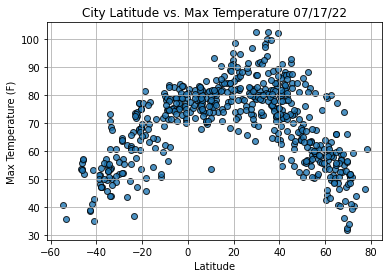

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

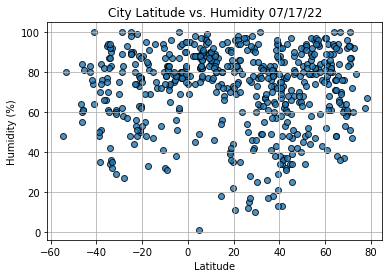

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

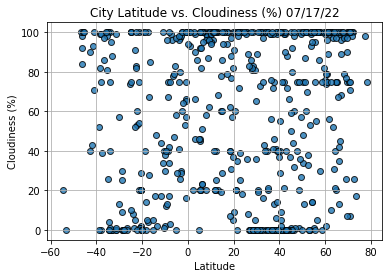

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

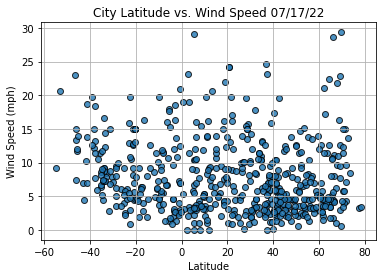

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [17]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
index13 = city_data_df.loc[13]
index13

City                      Dunedin
Country                        NZ
Date          2022-07-17 22:44:53
Lat                      -45.8742
Lng                      170.5036
Max Temp                    56.98
Humidity                       61
Cloudiness                    100
Wind Speed                  11.77
Name: 13, dtype: object

In [19]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Georgetown,MY,2022-07-17 22:47:27,5.4112,100.3354,82.89,92,20,1.01
4,Brody,UA,2022-07-17 22:47:28,50.0879,25.1503,50.68,83,34,5.99
6,Dukat,RU,2022-07-17 22:47:28,62.5500,155.5500,49.71,84,100,4.59
8,Trebinje,BA,2022-07-17 22:47:29,42.7119,18.3442,82.76,32,0,19.57
10,Hilo,US,2022-07-17 22:47:30,19.7297,-155.0900,92.28,73,100,13.80


In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

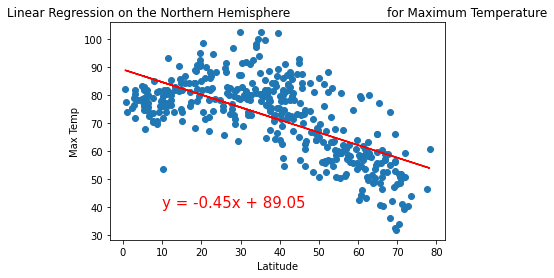

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

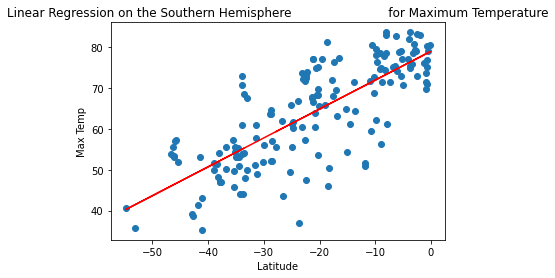

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

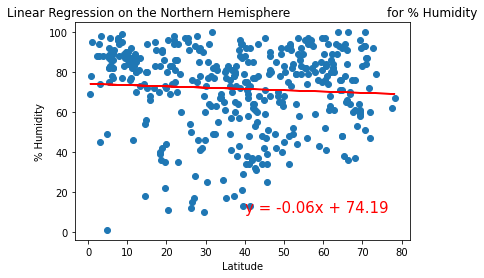

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

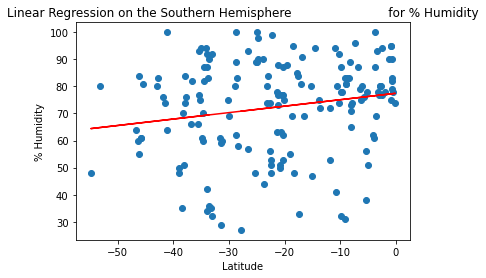

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

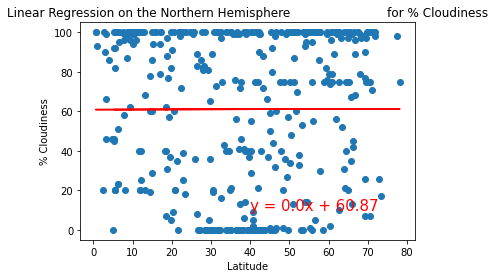

In [25]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

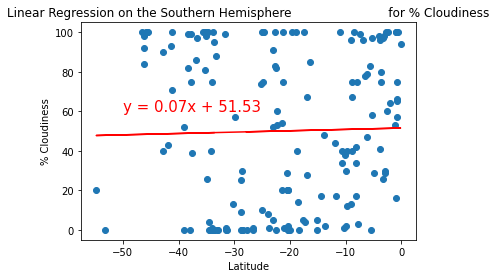

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

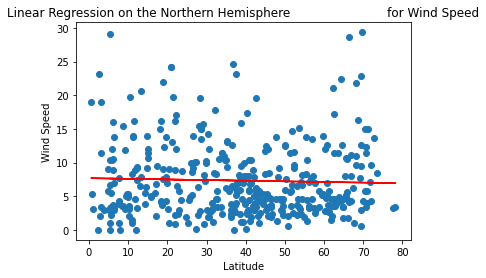

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

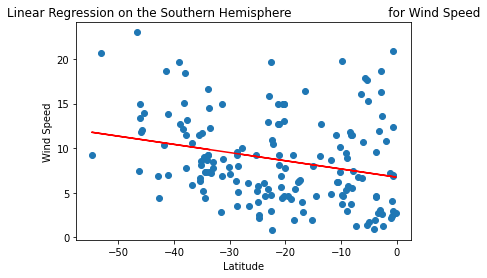

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [29]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


In [30]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Georgetown,MY,2022-07-17 22:47:27,5.4112,100.3354,82.89,92,20,1.01
5,Atuona,PF,2022-07-17 22:47:28,-9.8000,-139.0333,78.12,78,12,19.77
8,Trebinje,BA,2022-07-17 22:47:29,42.7119,18.3442,82.76,32,0,19.57
12,Jalu,LY,2022-07-17 22:47:32,29.0331,21.5482,81.95,42,0,15.79
15,Bubaque,GW,2022-07-17 22:47:33,11.2833,-15.8333,80.40,85,100,13.85
16,Butaritari,KI,2022-07-17 22:47:33,3.0707,172.7902,81.93,74,66,11.36
18,Sarangani,PH,2022-07-17 22:47:34,5.4033,125.4636,78.89,82,100,6.69
26,Tuni,IN,2022-07-17 22:47:37,17.3500,82.5500,77.63,91,100,9.46
32,Phan Thiet,VN,2022-07-17 22:44:54,10.9333,108.1000,77.25,87,96,8.28
35,Koumac,NC,2022-07-17 22:47:42,-20.5667,164.2833,75.07,63,29,4.41


In [31]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
2,Georgetown,MY,82.89,5.4112,100.3354,
5,Atuona,PF,78.12,-9.8000,-139.0333,
8,Trebinje,BA,82.76,42.7119,18.3442,
12,Jalu,LY,81.95,29.0331,21.5482,
15,Bubaque,GW,80.40,11.2833,-15.8333,
16,Butaritari,KI,81.93,3.0707,172.7902,
18,Sarangani,PH,78.89,5.4033,125.4636,
26,Tuni,IN,77.63,17.3500,82.5500,
32,Phan Thiet,VN,77.25,10.9333,108.1000,
35,Koumac,NC,75.07,-20.5667,164.2833,


In [32]:
import pandas as pd
import gmaps
import requests
# Import the API key.
from config import g_key

In [34]:
# Set parameters to search for a hotel.
params = {
    "radius": 5000,
    "type": "lodging",
    "key": g_key
}